In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
#read excel data
data = pd.read_excel(r"C:\Users\user\Downloads\iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

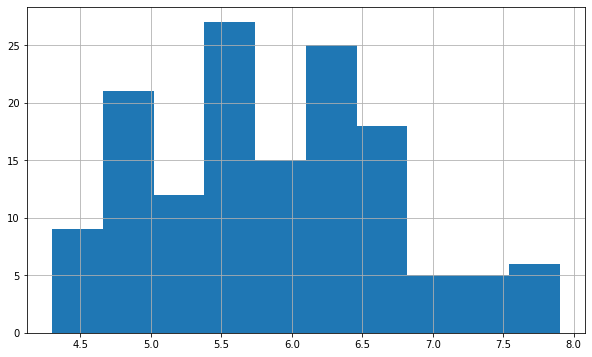

In [7]:
#plot SL
freqgraph = data['SL']
freqgraph.hist(figsize=(10,6))
plt.show()

In [8]:
data['SL']=data['SL'].fillna(data['SL'].median())
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

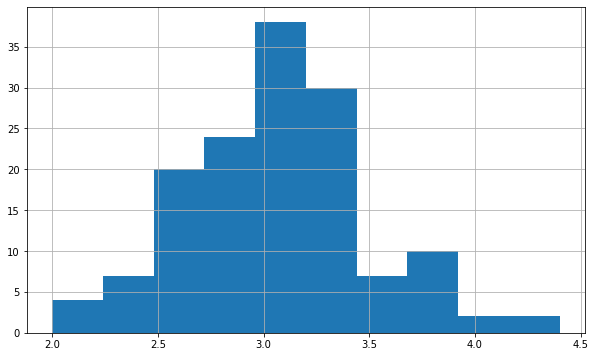

In [9]:
#plot SW
freqgraph = data['SW']
freqgraph.hist(figsize=(10,6))
plt.show()

In [10]:
data['SW']=data['SW'].fillna(data['SW'].median())
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

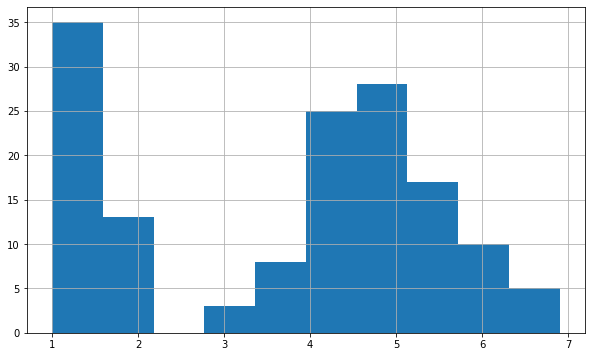

In [11]:
#plot PL
freqgraph = data['PL']
freqgraph.hist(figsize=(10,6))
plt.show()

In [12]:
data['PL']=data['PL'].fillna(data['PL'].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
#find outliers by plotting box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x14e2e7fa850>,
 'caps': [<matplotlib.lines.Line2D at 0x14e2e7faf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e2e7fa550>],
 'medians': [<matplotlib.lines.Line2D at 0x14e2e80b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e2e80b970>],
 'means': []}

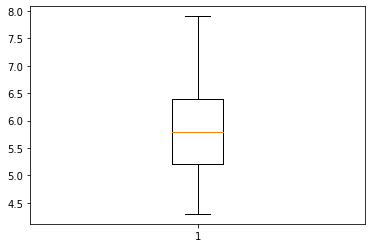

In [14]:
plt.boxplot(data["SL"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14e2f8b39d0>,
 'caps': [<matplotlib.lines.Line2D at 0x14e2f8be0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e2f8b36d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14e2f8be790>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e2f8beaf0>],
 'means': []}

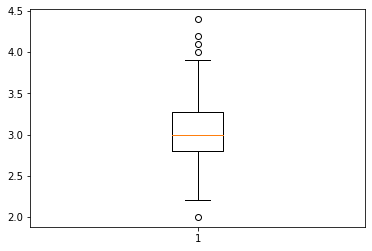

In [15]:
plt.boxplot(data["SW"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14e2f918070>,
 'caps': [<matplotlib.lines.Line2D at 0x14e2f918730>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e2f90acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x14e2f918df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e2f926190>],
 'means': []}

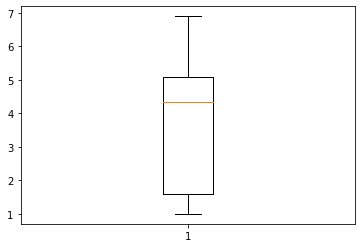

In [16]:
plt.boxplot(data["PL"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14e2f96cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x14e2f97a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e2f96c910>],
 'medians': [<matplotlib.lines.Line2D at 0x14e2f97a9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e2f97ad60>],
 'means': []}

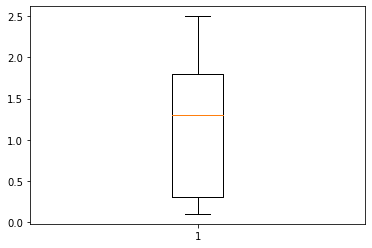

In [17]:
plt.boxplot(data["PW"])

In [18]:
#find quartiles
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

Q1:  2.8 
Q2:  3.0 
Q3:  3.25


In [19]:
#find IQR
IQR = Q3 - Q1
print('IQR: ',IQR)

IQR:  0.4500000000000002


In [20]:
#find Upper and lower limits
low_lmt = Q1-1.5*IQR
upp_lmt= Q3+1.5*IQR
print("Lower limit is : ",low_lmt)
print("Upper limit is : ",upp_lmt)

Lower limit is :  2.1249999999999996
Upper limit is :  3.9250000000000003


In [21]:
# outliers
outliers = []
for i in data['SW']:
    if((i>upp_lmt)or(i<low_lmt)):
      outliers.append(i)

In [22]:
#Outliers that are below lower limit
ind_low = data['SW']<low_lmt
index_low = data.loc[ind_low].index
index_low

Int64Index([60], dtype='int64')

In [23]:
#Outliers that are above upper limit
ind_upp = data['SW']>upp_lmt
index_upp = data.loc[ind_upp].index
index_upp

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
#Drop the above indexes
data.drop(index_low,inplace=True)
data.drop(index_upp,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x14e2fa1c940>,
 'caps': [<matplotlib.lines.Line2D at 0x14e2fa27040>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e2fa1c5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x14e2fa27700>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e2fa27a60>],
 'means': []}

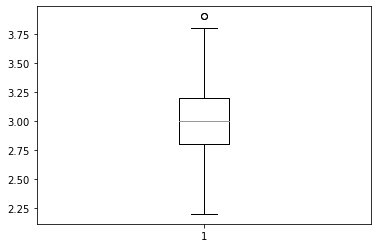

In [26]:
plt.boxplot(data["SW"])

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [27]:
x = data.drop(['Classification'],axis=1)
y = data['Classification']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix ,accuracy_score , precision_score , f1_score

In [31]:
print("accuracy :" , accuracy_score(y_test , y_pred))
print("precision score : " , precision_score(y_test,y_pred , average="weighted"))
print("f1 score :" ,f1_score(y_test ,y_pred ,average="weighted"))

accuracy : 0.9310344827586207
precision score :  0.9310344827586207
f1 score : 0.9310344827586207


In [32]:
#finding confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predicted=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

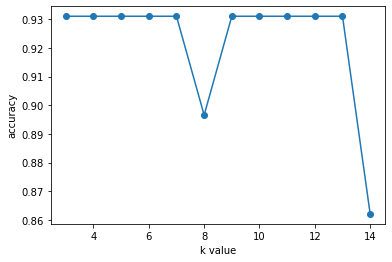

In [35]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [36]:
#from above we can see max accuracy at k=4

In [37]:
classifier = KNeighborsClassifier(n_neighbors= 4,metric='minkowski')
classifier.fit(x_train,y_train)
y_predicted=classifier.predict(x_test)

In [38]:
print("accuracy :" , accuracy_score(y_test , y_predicted))
print("precision score : " , precision_score(y_test,y_predicted , average="weighted"))
print("f1 score :" ,f1_score(y_test ,y_predicted,average="weighted"))

accuracy : 0.9310344827586207
precision score :  0.9310344827586207
f1 score : 0.9310344827586207


Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predicted_rf = rf.predict(x_test)
print("accuracy :" , accuracy_score(y_test , y_predicted_rf))
print("precision score : " , precision_score(y_test,y_predicted_rf , average="weighted"))
print("f1 score :" ,f1_score(y_test ,y_predicted_rf ,average="weighted"))

accuracy : 0.896551724137931
precision score :  0.9
f1 score : 0.8968109929997409


SVM

In [43]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ="linear")
svm_linear.fit(x_train,y_train)
y_predict_svm = svm_linear.predict(x_test)

print("accuracy :" , accuracy_score(y_test , y_predict_svm))
print("precision score : " , precision_score(y_test,y_predict_svm, average="weighted"))
print("f1 score :" ,f1_score(y_test ,y_predict_svm ,average="weighted"))

accuracy : 0.896551724137931
precision score :  0.9
f1 score : 0.8968109929997409


Logistic regression model and knn model is having max accuracy